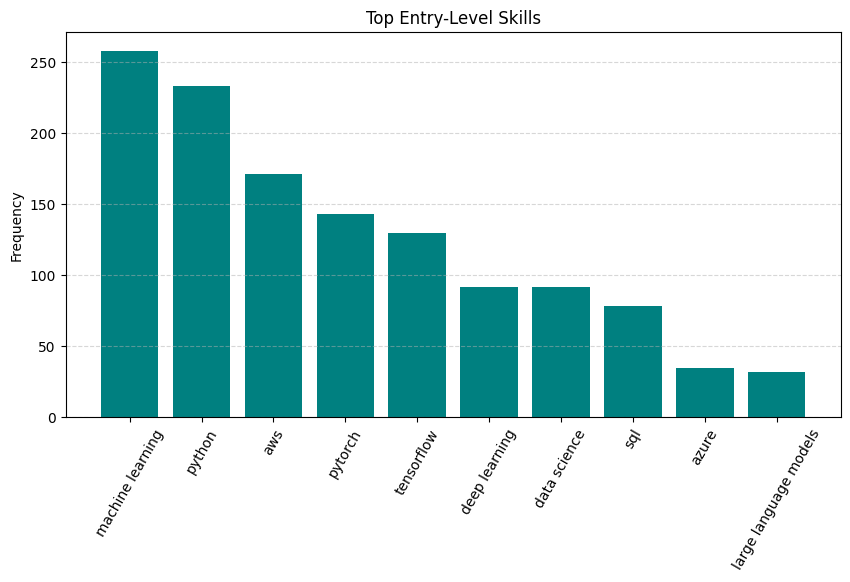

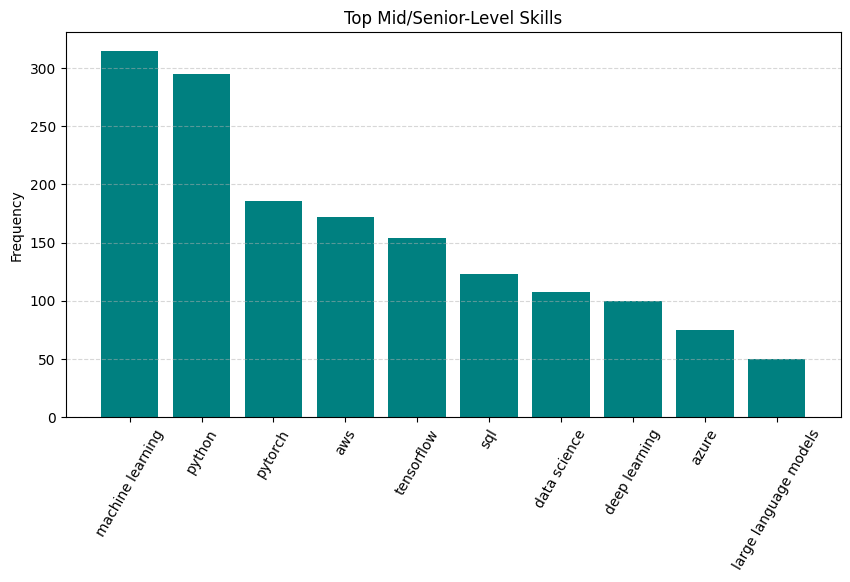


Top 3 Overall Skills:
machine learning: 836
python: 746
aws: 489


In [12]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

data_base = pd.read_csv('../api/dataset.csv')

data_base.dropna(subset=['job_description_text', 'seniority_level'], inplace=True)
data_base['seniority_level'] = data_base['seniority_level'].str.lower()

skills = {
    "python", "javascript", "react", "node.js", "flask", "fastapi",
    "pytorch", "tensorflow", "machine learning", "deep learning",
    "large language models","sql", "mongodb", "data science", "aws", "azure"
}

def filter_words(text):
    text = text.lower()
    
    matched_skills = []
    for skill in skills:
        if skill in text:
            matched_skills.append(skill)
    return matched_skills
data_base['keywords'] = data_base['job_description_text'].apply(filter_words)


entry_jobs = data_base[data_base['seniority_level'].str.contains('entry')]
senior_jobs = data_base[data_base['seniority_level'].str.contains('mid|senior')]

entry_counts = Counter(entry_jobs['keywords'].sum())
senior_counts = Counter(senior_jobs['keywords'].sum())

def plot_skills(counter, title):
    if not counter:
        print(f"No data for: {title}")
        return

    top_items = counter.most_common(10)
    labels, values = zip(*top_items)

    plt.figure(figsize=(10, 5))
    plt.bar(labels, values, color='teal')
    plt.title(title)
    plt.ylabel("Frequency")
    plt.xticks(rotation=60)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

plot_skills(entry_counts, "Top Entry-Level Skills")
plot_skills(senior_counts, "Top Mid/Senior-Level Skills")

overall_counts = Counter(data_base['keywords'].sum())
print("\nTop 3 Overall Skills:")
for skill, freq in overall_counts.most_common(3):
    print(f"{skill}: {freq}")
